## Preprocessing

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import lightgbm as lgb
from lightgbm import LGBMClassifier
import shap
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_validate

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
os.chdir('c:/users/fre_f/pythonprojects/bacteriological/')

In [3]:
df = pd.read_csv('./data/final/05_species_dedornot_ra.csv')

In [4]:
df.head()

,Index,Patient=1,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,...,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392,Gender F=1,Age,Lenses (Y_N),Antibiotics (B_A),OSDI score,DEQ5 score
0,P1,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,1,65,0,0,NaN,NaN
1,P2,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,1,67,0,0,31.25,17.0
2,P3,1,0.000233,0.007146,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.01888,0.0,0.0,1,33,0,0,33.30,16.0
3,P4,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,1,66,0,0,93.75,21.0
4,P5,1,0.000164,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.0,0.0,0,69,0,0,6.25,7.0


In [5]:
df.iloc[:,2:1340]

,None;Other;Other;Other;Other;Other;Other,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter;s__smithii,k__Bacteria;p__Acidobacteria;c__Acidobacteria;o__NA;f__NA;g__Blastocatella;s__sp3006,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp3737,k__Bacteria;p__Acidobacteria;c__Holophagae;o__NA;f__NA;g__NA;s__sp4001,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Acidimicrobiaceae;g__NA;s__sp4262,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4310,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4312,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Iamiaceae;g__Iamia;s__sp4316,k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__NA;g__NA;s__sp4642,...,k__Bacteria;p__Tenericutes;c__Mollicutes;o__NA;f__NA;g__NA;s__sp67941,k__Bacteria;p__Thermotogae;c__Thermotogae;o__Thermotogales;f__Thermotogaceae;g__NA;s__sp68412,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__NA;f__NA;g__NA;s__sp68841,k__Bacteria;p__Verrucomicrobia;c__Opitutae;o__Opitutales;f__Opitutaceae;g__Opitutus;s__sp68878,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69092,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__Chthoniobacteraceae;g__Chthoniobacter;s__sp69093,k__Bacteria;p__Verrucomicrobia;c__Spartobacteria;o__Chthoniobacterales;f__NA;g__Terrimicrobium;s__sacchariphilum,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Akkermansia;s__muciniphila,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Haloferula;s__sp69345,k__Bacteria;p__Verrucomicrobia;c__Verrucomicrobiae;o__Verrucomicrobiales;f__Verrucomicrobiaceae;g__Roseibacillus;s__sp69392
0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.000233,0.007146,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01888,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.000164,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.000128,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
87,0.000153,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
88,0.000395,0.000000,0.0,0.0,0.0,0.000443,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
89,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [6]:
df.iloc[:,1]

0     1
1     1
2     1
3     1
4     1
     ..
86    0
87    0
88    0
89    0
90    0
Name: Patient=1, Length: 91, dtype: int64

In [7]:
X = df.iloc[:,2:1340]
y = df.iloc[:,1]

## Cross validate with leave one out and explain according to average of estimators

### XGBoost

In [8]:
clfxgb = XGBClassifier(random_state=42)
looxgb = LeaveOneOut()
xgb_scores = cross_validate(clfxgb, X, y, cv=looxgb, scoring='accuracy', return_estimator=True)


In [9]:
xgb_scores

{'fit_time': array([0.64012384, 0.62893534, 0.63472438, 0.62880254, 0.6244266 ,
        0.63481307, 0.62994218, 0.62829924, 0.61151338, 0.61982465,
        0.64622211, 0.63452125, 0.63981867, 0.63566709, 0.63407063,
        0.63828087, 0.63164067, 0.63430262, 0.6322422 , 0.61509562,
        0.62312961, 0.63135386, 0.62625122, 0.62883449, 0.62685466,
        0.62966824, 0.63099241, 0.62491322, 0.62687635, 0.60650373,
        0.60324192, 0.61412024, 0.62320948, 0.61658168, 0.64436388,
        0.63056874, 0.63061643, 0.61516356, 0.63152719, 0.6222775 ,
        0.63123679, 0.63254786, 0.63107538, 0.62493396, 0.62941456,
        0.63552737, 0.62917423, 0.62852049, 0.63100386, 0.6284821 ,
        0.61812425, 0.59119892, 0.61251044, 0.64388323, 0.63635778,
        0.63793874, 0.6248877 , 0.63633394, 0.62884855, 0.63010263,
        0.63329124, 0.63039351, 0.62353945, 0.62986541, 0.62834382,
        0.63049769, 0.62774849, 0.62711263, 0.63041687, 0.63063049,
        0.63354683, 0.6244576 , 0.61

In [10]:
feature_importances_complete = []

for idx, estimator in enumerate(xgb_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances)
    feature_importances_complete.append(feature_importances)

feature_importances_complete = pd.concat(feature_importances_complete)

The most important features for estimator 0:
                                                    Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria...    0.130896
k__Bacteria;p__Proteobacteria;c__Alphaproteobac...    0.077688
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactoba...    0.067914
k__Bacteria;p__Actinobacteria;c__Actinobacteria...    0.059290
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clos...    0.053640
...                                                        ...
k__Bacteria;p__Cyanobacteria;c__Cyanobacteria;o...    0.000000
k__Bacteria;p__Cyanobacteria;c__Cyanobacteria;o...    0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...    0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...    0.000000
k__Bacteria;p__Verrucomicrobia;c__Verrucomicrob...    0.000000

[1338 rows x 1 columns]
The most important features for estimator 1:
                                                    Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria...    0.178410
k__

In [11]:
feature_importances_complete

,Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Propionibacterium;s__granulosum,0.130896
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodospirillales;f__Rhodospirillaceae;g__Azospirillum-Skermanella;s__sp45983-sp46213,0.077688
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__sanguinis,0.067914
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Micrococcales;f__Micrococcaceae;g__Micrococcus;s__cohnii,0.059290
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__NA;s__sp35472,0.053640
...,...
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Rubus hybrid cultivar;f__Rubus hybrid cultivar;g__Fragaria-Rubus;s__hybrid-x,0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Pinus wallichiana;f__Pinus wallichiana;g__Pinus;s__wallichiana,0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Orthotrichum rogeri;f__Orthotrichum rogeri;g__Orthotrichum;s__rogeri,0.000000
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__NA;f__NA;g__NA;s__sp22851,0.000000


In [12]:
feature_importances_complete.shape

(121758, 1)

In [13]:
fic = feature_importances_complete.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [14]:
fic[:15]

,Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Propionibacterium;s__granulosum,0.134705
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus;s__sanguinis,0.097216
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodospirillales;f__Rhodospirillaceae;g__Azospirillum-Skermanella;s__sp45983-sp46213,0.069615
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Atopostipes;s__suicloacalis,0.040457
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__NA;s__sp35472,0.040041
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Burkholderiales;f__Comamonadaceae;g__Acidovorax;s__temperans,0.034991
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminococcaceae;g__Subdoligranulum;s__sp35582,0.034798
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Lachnospiraceae;g__Blautia;s__sp32056,0.032947
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__accolens,0.031125
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__johnsonii,0.030681


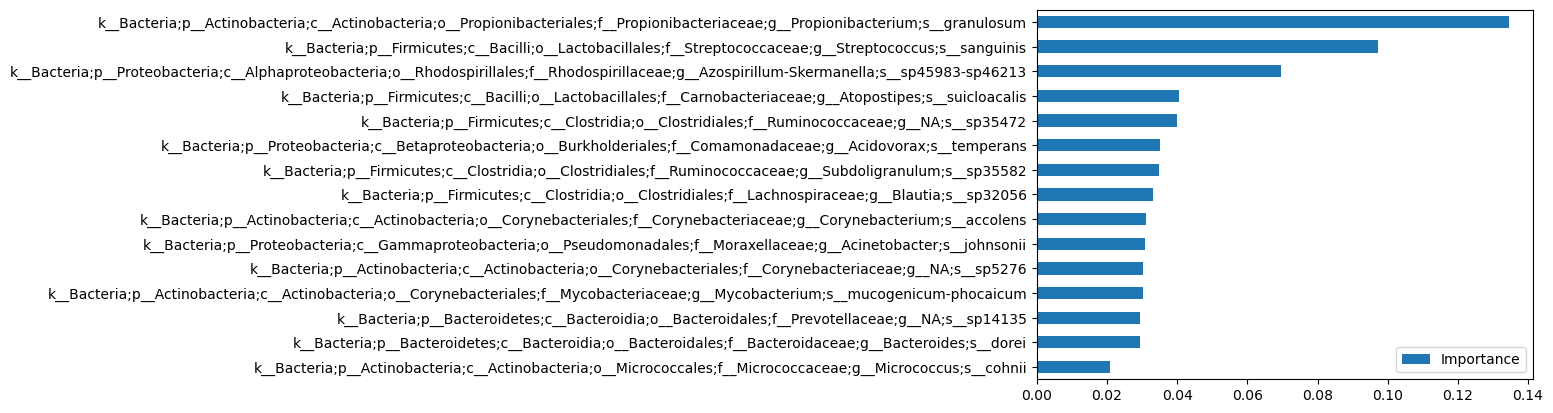

In [15]:
plot_fic = fic[:15]
plot_fic.plot(kind='barh').invert_yaxis()

In [16]:
for estimator in xgb_scores['estimator']:
    explainerxgb = shap.Explainer(estimator, X)
    shap_valuesxgb = explainerxgb.shap_values(X)

[11:07:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:07:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:07:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[11:07:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-au

In [17]:
np.shape(shap_valuesxgb)

(91, 1338)

In [18]:
shap_valuesxgb_mean = np.mean(shap_valuesxgb, axis=0, keepdims=True)

In [19]:
np.shape(shap_valuesxgb_mean)

(1, 1338)

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


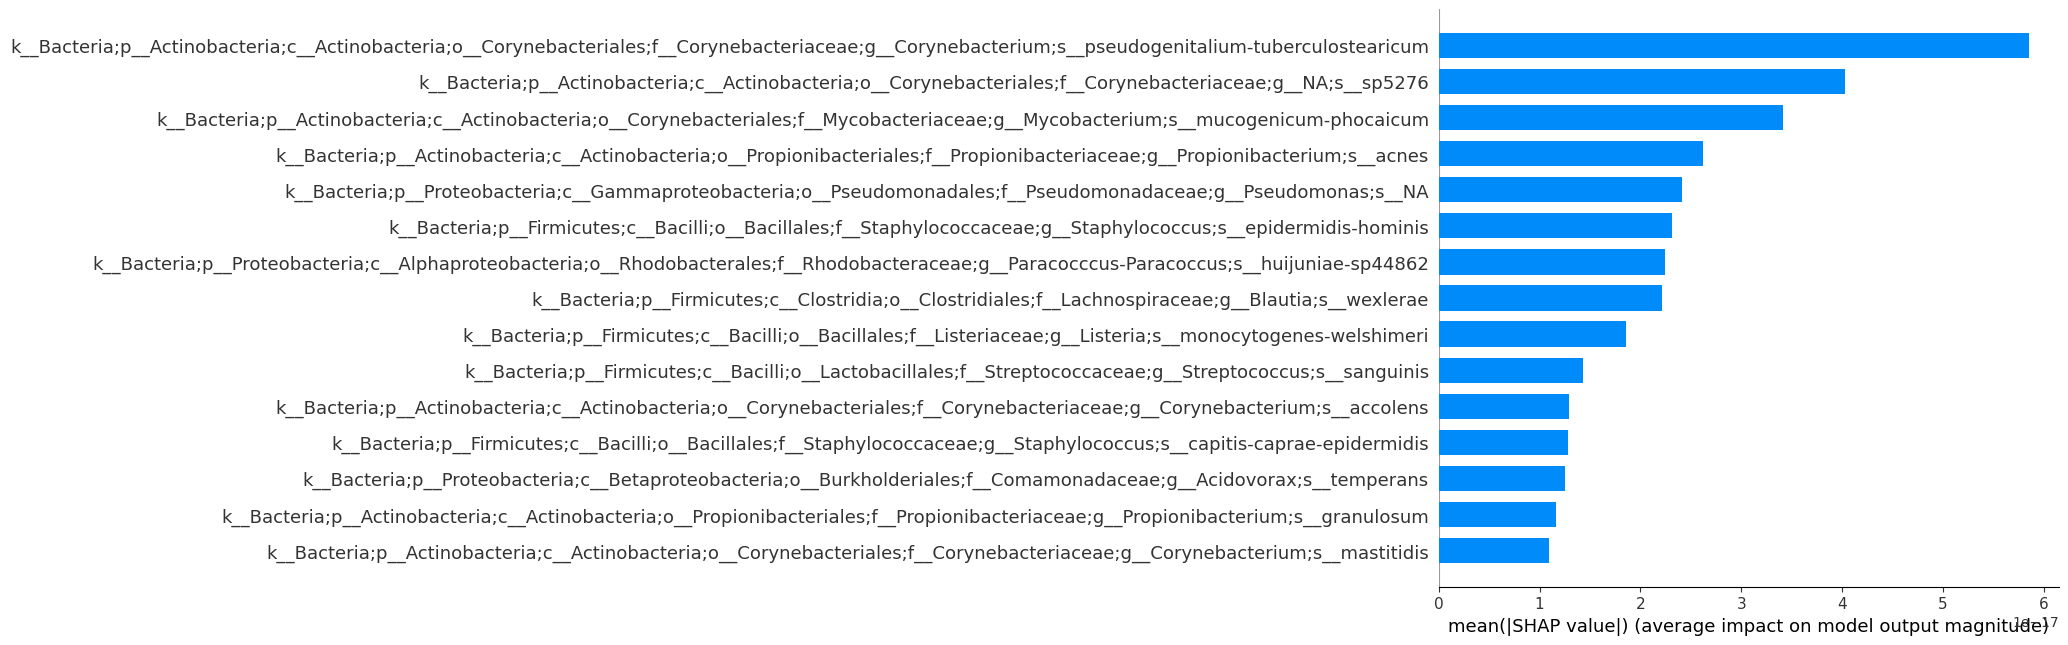

In [20]:
shap.summary_plot(shap_valuesxgb_mean, X, plot_type='bar', max_display=15)

### LightGBM

In [21]:
clflgbm = LGBMClassifier(random_state=42)
loolgbm = LeaveOneOut()
lgbm_scores = cross_validate(clflgbm, X, y, cv=loolgbm, scoring='accuracy', return_estimator=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 60, number of negative: 30
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.666667 -> initscore=0.693147
[LightGBM] [Info] Start training from score 0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [22]:
lgbm_scores

{'fit_time': array([0.12228775, 0.03405643, 0.027035  , 0.02712107, 0.03540397,
        0.02186227, 0.0231297 , 0.03160167, 0.03250337, 0.02729893,
        0.026546  , 0.02955103, 0.03525949, 0.03633213, 0.03444934,
        0.03681111, 0.03253341, 0.02992082, 0.02763867, 0.02238536,
        0.03399444, 0.03503203, 0.02122068, 0.03802562, 0.02989364,
        0.0345304 , 0.03522992, 0.02182221, 0.03760195, 0.02765322,
        0.02237463, 0.02139902, 0.0301137 , 0.03259945, 0.02544165,
        0.02561498, 0.02918196, 0.02123189, 0.035326  , 0.02189565,
        0.02548671, 0.02758861, 0.02002597, 0.02041292, 0.02047944,
        0.02684307, 0.02722859, 0.02989483, 0.03240728, 0.03202271,
        0.03451109, 0.02888107, 0.03241301, 0.02950335, 0.0340097 ,
        0.02791572, 0.03347325, 0.02768445, 0.02782249, 0.02613091,
        0.03655124, 0.01997709, 0.02654982, 0.0294795 , 0.03275037,
        0.02855968, 0.03678942, 0.0361445 , 0.02560496, 0.03303862,
        0.02402735, 0.02709103, 0.01

In [23]:
feature_importances_complete_lgb = []

for idx, estimator in enumerate(lgbm_scores['estimator']):
    print(f'The most important features for estimator {idx}:')
    feature_importances_lgb = pd.DataFrame(estimator.feature_importances_,
                                       index=X.columns,
                                       columns=['Importance']).sort_values('Importance', ascending=False)
    print(feature_importances_lgb)
    feature_importances_complete_lgb.append(feature_importances_lgb)

feature_importances_complete_lgb = pd.concat(feature_importances_complete_lgb)

The most important features for estimator 0:
                                                    Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria...          30
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacilla...          23
k__Bacteria;p__Actinobacteria;c__Actinobacteria...          22
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...          19
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...          16
...                                                        ...
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Verrucomicrobia;c__Verrucomicrob...           0

[1338 rows x 1 columns]
The most important features for estimator 1:
                                                    Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria...          27
k__

                                                    Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria...          29
k__Bacteria;p__Proteobacteria;c__Gammaproteobac...          22
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacilla...          19
k__Bacteria;p__Actinobacteria;c__Actinobacteria...          18
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacilla...          18
...                                                        ...
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__...           0
k__Bacteria;p__Verrucomicrobia;c__Verrucomicrob...           0

[1338 rows x 1 columns]
The most important features for estimator 39:
                                                    Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria...          28
k__Bacteria;p__Proteobacteria;c__Gammaproteobac

In [24]:
feature_importances_complete_lgb

,Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__pseudogenitalium-tuberculostearicum,30
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Listeriaceae;g__Listeria;s__monocytogenes-welshimeri,23
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__mastitidis,22
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__radioresistens,19
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__NA,16
...,...
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Pinus wallichiana;f__Pinus wallichiana;g__Pinus;s__wallichiana,0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Orthotrichum rogeri;f__Orthotrichum rogeri;g__Orthotrichum;s__rogeri,0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__NA;f__NA;g__NA;s__sp22851,0
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__NA;f__NA;g__NA;s__melongena,0


In [25]:
fic_lgb = feature_importances_complete_lgb.groupby(level=0).mean().sort_values('Importance', ascending=False)

In [26]:
fic_lgb[:15]

,Importance
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__pseudogenitalium-tuberculostearicum,30.945055
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__mastitidis,19.472527
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__NA,18.846154
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Listeriaceae;g__Listeria;s__monocytogenes-welshimeri,17.802198
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__radioresistens,17.219780
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Propionibacterium;s__acnes,16.780220
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__epidermidis-hominis,16.538462
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Sphingomonadales;f__Sphingomonadaceae;g__Sphingobium;s__yanoikuyae,11.615385
k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Moraxellaceae;g__Acinetobacter;s__bouvetii-johnsonii,9.307692
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__NA;s__sp5276,8.219780


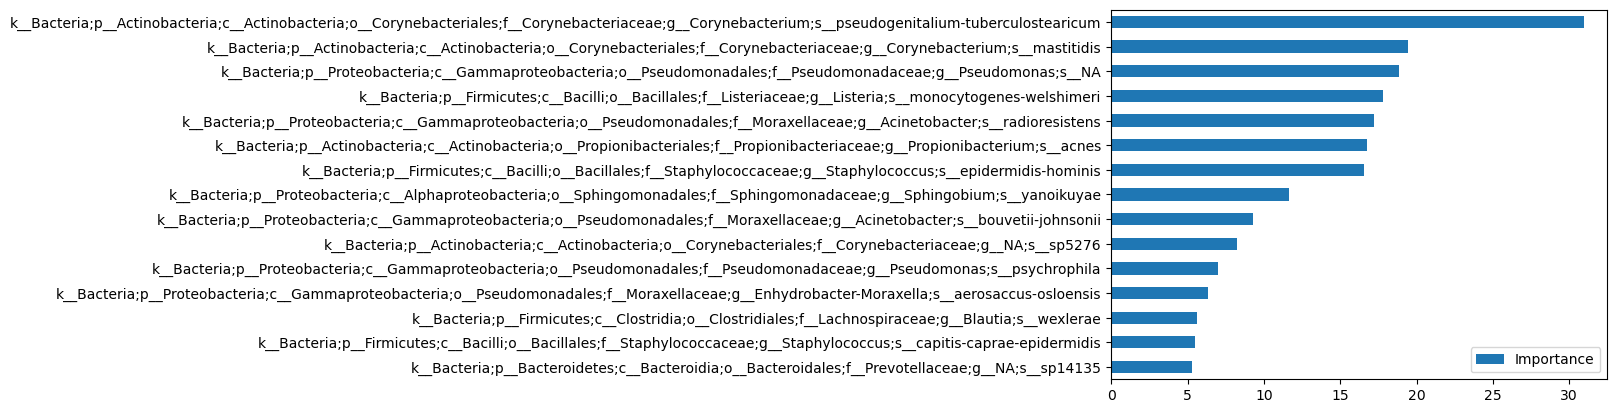

In [27]:
plot_fic_lgb = fic_lgb[:15]
plot_fic_lgb.plot(kind='barh').invert_yaxis()

In [28]:
for estimator in lgbm_scores['estimator']:
    explainerlgb = shap.Explainer(estimator, X)
    shap_valueslgb = explainerlgb.shap_values(X)    
    

In [29]:
np.shape(shap_valueslgb)

(91, 1338)

In [30]:
shap_valueslgb_mean = np.mean(shap_valueslgb, axis=0, keepdims=True)

In [31]:
np.shape(shap_valueslgb_mean)

(1, 1338)

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


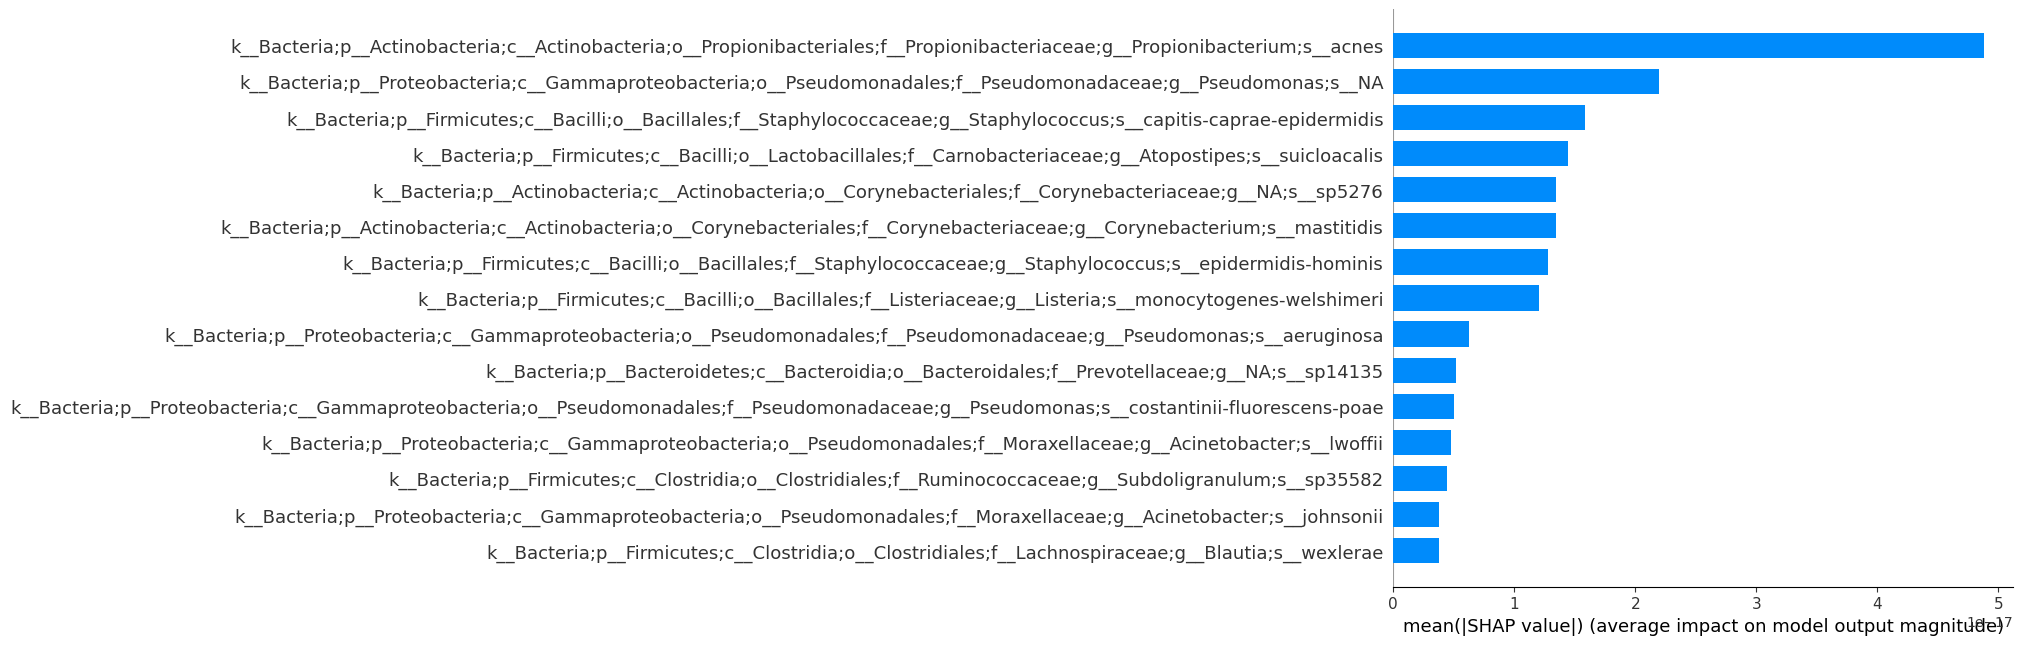

In [32]:
shap.summary_plot(shap_valueslgb_mean, X, plot_type='bar', max_display=15)

### Multilayer perceptron 

In [33]:
from sklearn.neural_network import MLPClassifier
clfmlp = MLPClassifier(solver="adam", activation="relu", learning_rate="constant", random_state=42, max_iter=30000, verbose=False)
clfmlp.out_activation_="softmax"

loomlp = LeaveOneOut()
mlp_scores = cross_validate(clfmlp, X, y, cv=loomlp, scoring='accuracy', return_estimator=True)

In [34]:
mlp_scores

{'fit_time': array([3.86326766, 3.82536578, 3.82295942, 3.85902619, 3.85303473,
        3.90274072, 3.8652935 , 3.86475945, 3.79073286, 3.78681946,
        3.82537174, 3.92319274, 3.75824666, 3.88066196, 3.88034034,
        4.01701331, 3.86609197, 3.96304178, 3.63903332, 3.8003056 ,
        3.57602382, 3.67367959, 3.77192974, 3.79919028, 3.685673  ,
        3.69824457, 3.71438909, 3.8828733 , 4.00752282, 3.85389185,
        3.93634844, 3.90935493, 3.82597327, 3.77945352, 3.70811701,
        3.71392417, 3.76903105, 3.73697758, 3.76351738, 3.71110153,
        3.74671149, 3.77679706, 3.70840406, 3.73597479, 3.66038275,
        3.83655262, 3.69105268, 3.64320755, 3.66723037, 3.7800138 ,
        3.67825317, 3.74861145, 3.73132777, 3.7448473 , 3.75718617,
        3.81824255, 3.7385931 , 3.88870811, 3.88173866, 3.66770768,
        3.81900644, 3.7837646 , 3.80994821, 3.82990193, 3.46288776,
        3.84077692, 3.87083554, 3.75616717, 3.78881955, 3.78137922,
        3.80441833, 3.78730965, 3.75

In [35]:
# Every estimator in mlp_scores need to be fitted and permutation importance run on each estimator.
MLP_feature_importances_complete = []

for idx, estimator in enumerate(mlp_scores['estimator']):
    mlpimportance = estimator.fit(X, y)
    result = permutation_importance(mlpimportance,X, y,n_repeats=20, random_state = 42)
    MLPfeatures = pd.DataFrame(mlpimportance.feature_names_in_,columns=['Features'])
    MLPfeatures['Importance'] = result.importances_mean.tolist()
    #Sort by importance
    MLPfeatures = MLPfeatures.sort_values(by = 'Importance',ascending=False)
    print(f'The most important features for estimator {idx}:')
    print(MLPfeatures)
    MLP_feature_importances_complete.append(MLPfeatures)

MLP_feature_importances_complete = pd.concat(MLP_feature_importances_complete)

The most important features for estimator 0:
                                               Features  Importance
546   k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...    0.052747
238   k__Bacteria;p__Actinobacteria;c__Actinobacteri...    0.039011
1118  k__Bacteria;p__Proteobacteria;c__Betaproteobac...    0.018132
557   k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...    0.013736
1119  k__Bacteria;p__Proteobacteria;c__Betaproteobac...    0.012088
...                                                 ...         ...
446   k__Bacteria;p__Cyanobacteria;c__Chloroplast;o_...    0.000000
445   k__Bacteria;p__Cyanobacteria;c__Chloroplast;o_...    0.000000
444   k__Bacteria;p__Cyanobacteria;c__Chloroplast;o_...    0.000000
443   k__Bacteria;p__Cyanobacteria;c__Chloroplast;o_...    0.000000
1337  k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...    0.000000

[1338 rows x 2 columns]
The most important features for estimator 1:
                                               Features  Importance
5

In [36]:
MLPfeatures.shape

(1338, 2)

In [37]:
MLP_feature_importances_complete.shape

(121758, 2)

In [38]:
fic_mlp = MLP_feature_importances_complete.groupby('Features').mean().sort_values('Importance', ascending=False)

In [39]:
fic_mlp.shape

(1338, 1)

In [40]:
fic_mlp[:15]

,Importance
Features,
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__capitis-caprae-epidermidis,0.052747
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Propionibacteriales;f__Propionibacteriaceae;g__Propionibacterium;s__acnes,0.039011
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__NA;s__sp50014,0.018132
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__pasteuri,0.013736
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__NA;s__sp50017,0.012088
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__kroppenstedtii,0.012088
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Staphylococcaceae;g__Staphylococcus;s__pasteuri-warneri,0.010989
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Family XII;g__Exiguobacterium;s__aurantiacum-mexicanum,0.010989
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium;s__mastitidis,0.010989


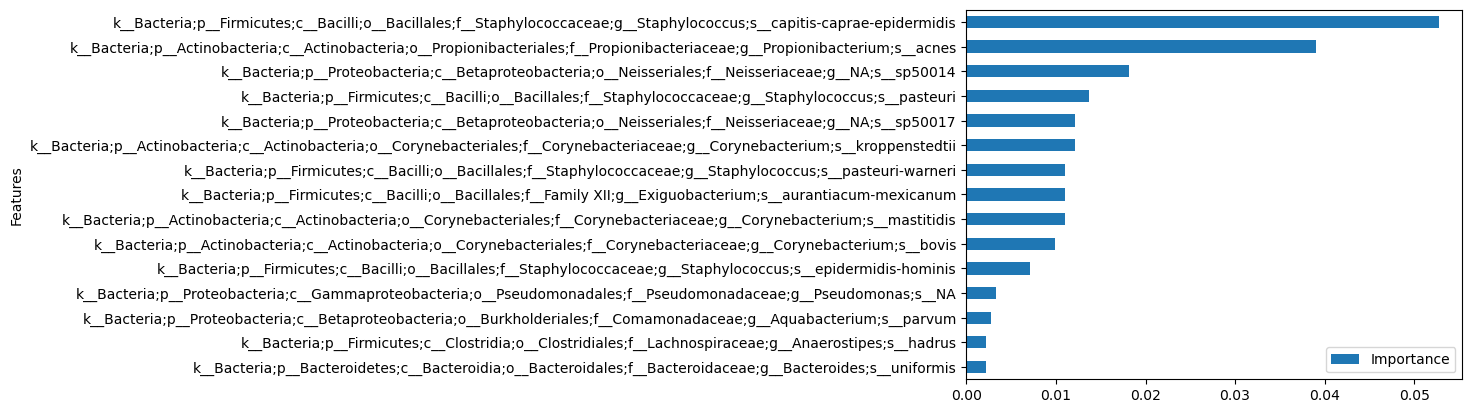

In [41]:
plot_fic_mlp = fic_mlp[:15]
plot_fic_mlp.plot(kind='barh').invert_yaxis()

In [42]:
for estimator in mlp_scores['estimator']:
    explainermlp = shap.Explainer(mlpimportance.predict, X)
    shap_valuesmlp = explainermlp.shap_values(X)

Permutation explainer: 92it [06:04,  4.10s/it]                        
Permutation explainer: 92it [05:34,  3.76s/it]                        
Permutation explainer: 92it [05:33,  3.75s/it]                        
Permutation explainer: 92it [05:33,  3.75s/it]                        
Permutation explainer: 92it [05:33,  3.75s/it]                        
Permutation explainer: 92it [05:34,  3.75s/it]                        
Permutation explainer: 92it [05:32,  3.73s/it]                        
Permutation explainer: 92it [05:28,  3.69s/it]                        
Permutation explainer: 92it [05:29,  3.70s/it]                        
Permutation explainer: 92it [05:28,  3.69s/it]                        
Permutation explainer: 92it [05:28,  3.69s/it]                        
Permutation explainer: 92it [05:29,  3.70s/it]                        
Permutation explainer: 92it [05:28,  3.69s/it]                        
Permutation explainer: 92it [05:28,  3.69s/it]                        
Permut

In [43]:
np.shape(shap_valuesmlp)

(91, 1338)

In [44]:
shap_valuesmlp_mean = np.mean(shap_valuesmlp, axis=0, keepdims=True)

In [45]:
np.shape(shap_valuesmlp_mean)

(1, 1338)

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


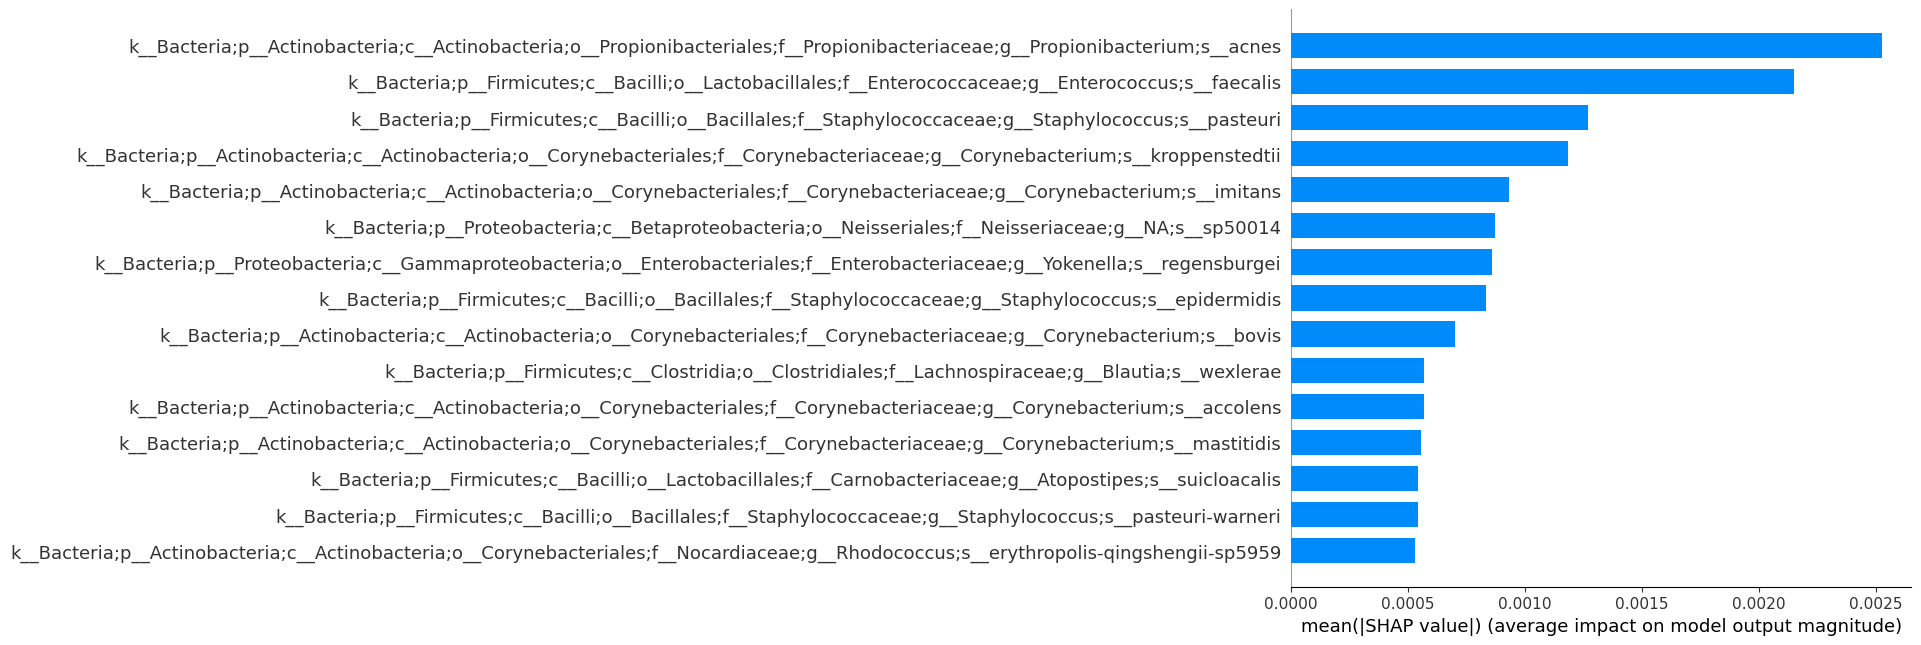

In [46]:
shap.summary_plot(shap_valuesmlp_mean, X, plot_type='bar', max_display=15)